<a href="https://colab.research.google.com/github/andrewpulsifr/COMP432_MACHINE_LEARNING_PROJECT/blob/main/COMP432_PROJECT_SUBMISSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mount google drive as source for data loading.**


### Mount and General use imports.

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [96]:
from google.colab import drive
drive.mount('/content/drive')  # follow the prompt

DATA_DIR   = "/content/drive/MyDrive/DATA_DIR"
TRAIN_PATH = f"{DATA_DIR}/train.csv"
TEST_PATH  = f"{DATA_DIR}/test.csv"
SAMPLE_SUB = f"{DATA_DIR}/sample_submission.csv"


!ls -lh "$DATA_DIR"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
total 400M
drwx------ 2 root root 4.0K Nov 24 18:25 exp_logs
drwx------ 4 root root 4.0K Nov 24 21:07 runs
-rw------- 1 root root 376K Nov  3 21:17 sample_submission.csv
drwx------ 2 root root 4.0K Nov 24 21:00 submissions
-rw------- 1 root root 120M Nov  3 21:17 test.csv
-rw------- 1 root root 280M Nov  3 21:17 train.csv


Read csv from content folder.

In [97]:
# Attempt loading from cs
train = pd.read_csv(TRAIN_PATH)
test  = pd.read_csv(TEST_PATH)
print("Shapes:", train.shape, test.shape)  # expecting (115406, 502) and (49460, 501)

Shapes: (115406, 502) (49460, 501)


## Data Inspection

### Check Integrity of the data scheme


Confirm data scheme matches spec.

**Spec**: *id , feature_0..feature_499, and label (0–49) in train; id + 500 features in test*

In [98]:
print(train.shape, test.shape)
train.head()

(115406, 502) (49460, 501)


,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_491,feature_492,feature_493,feature_494,feature_495,feature_496,feature_497,feature_498,feature_499,label
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.063888,43
1,1,0.000000,0.000000,0.000000,0.071982,0.000000,0.000000,0.000000,0.071982,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.071982,0.0,0.000000,16
2,2,0.111111,0.000000,0.111111,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,...,0.000000,0.111111,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,21
3,3,0.000000,0.087039,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.087039,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,2
4,4,0.000000,0.000000,0.069673,0.000000,0.069673,0.000000,0.069673,0.000000,0.000000,...,0.069673,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,1


In [99]:
# Inspect dataset
print("Shape:", train.shape)
print("Columns:", train.columns)
print(train.describe())   # summary stats

Shape: (115406, 502)
Columns: Index(['id', 'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8',
       ...
       'feature_491', 'feature_492', 'feature_493', 'feature_494',
       'feature_495', 'feature_496', 'feature_497', 'feature_498',
       'feature_499', 'label'],
      dtype='object', length=502)
                 id      feature_0      feature_1      feature_2  \
count  115406.00000  115406.000000  115406.000000  115406.000000   
mean    57702.50000       0.019694       0.015188       0.018202   
std     33314.98692       0.048032       0.046823       0.045241   
min         0.00000       0.000000       0.000000       0.000000   
25%     28851.25000       0.000000       0.000000       0.000000   
50%     57702.50000       0.000000       0.000000       0.000000   
75%     86553.75000       0.000000       0.000000       0.000000   
max    115405.00000       0.635001       0.548821       0.500000   

         

Ensure that the column names and length matches expectation and that there are no missing values.

In [100]:
# Columns & types
print("Columns:", len(train.columns))
print("Example cols:", train.columns[:10].tolist())

# NA checks
na_train = train.isna().sum().sum()
na_test  = test.isna().sum().sum()
print(f"Missing (train): {na_train:,} | Missing (test): {na_test:,}")

Columns: 502
Example cols: ['id', 'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8']
Missing (train): 0 | Missing (test): 0


Confirm there are no duplicate ids and that labels cover the required range and are already integer endcoded.

In [101]:
# ID uniqueness
assert train['id'].is_unique, "train id not unique"
assert test['id'].is_unique, "test id not unique"

# Label domain
labels = train['label'].unique()
print("Num classes:", len(labels), "| label min/max:", labels.min(), labels.max())

Num classes: 50 | label min/max: 0 49


Calculate how many times each unique label appears in the training data and display it in a data frame to see the distrubtion. Then using a bar chart visualize distribution.



In [102]:
label_counts = train['label'].value_counts().sort_index()
display(label_counts.to_frame("count").T)

label,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,2309,2306,2307,2309,2309,2309,2310,2307,2304,2309,...,2310,2310,2308,2308,2306,2310,2307,2305,2310,2309


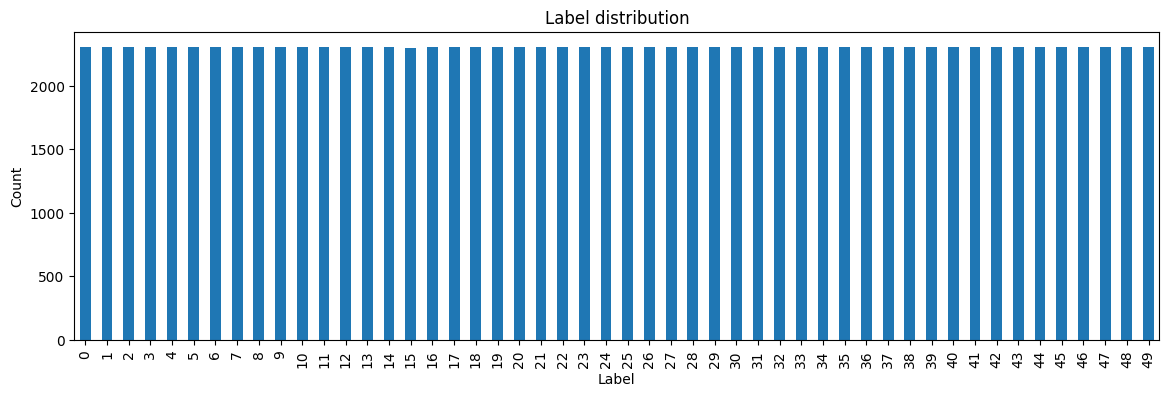

In [103]:
# Plot
ax = label_counts.plot(kind="bar", figsize=(14,4)) # plot bar graph with set size
ax.set_title("Label distribution")
ax.set_xlabel("Label")
ax.set_ylabel("Count")
plt.show() # display generated plot

### Gather information and create a basedline.

Determine the number of distinct classes and determine the accuracy of correct label assuming uniform distribution.

Then determine the accuracy if you were to predict the most frequent class

**Goal**: Establish a basline accuracy of predicting labels by pure chance and by majority rules.

**Output**: Confirms that labels are well-distributed and sets a baseline to far exceed.

In [104]:
n_classes = label_counts.shape[0] # returns a tuple representing dimensions of the series (number of rows)
chance = 1.0 / n_classes # chance if guessing uniformly at random
majority = label_counts.max() / len(train) # divide most common by length of set to see accuracy with most common
print(f"Chance baseline (uniform): {chance:.3%}")
print(f"Majority-class baseline:   {majority:.3%}")

Chance baseline (uniform): 2.000%
Majority-class baseline:   2.002%


Output to determine the characteristics of features such as.

**Variability**

To determine

1.   Feature selection
2.   Scaling
3. Model choice

In [105]:
feature_cols = [c for c in train.columns if c.startswith("feature_")] # collect all feature columns
X = train[feature_cols].values.astype(np.float64) # create array containing feature data

# Per-feature statistical summary
means = X.mean(axis=0)
stds  = X.std(axis=0)
mins  = X.min(axis=0)
maxs  = X.max(axis=0)
vars_ = X.var(axis=0)

Organizing Calcualted statistics into a data frame in the order of highest to lowest variance.

**Syntax**

1.   `pd.DataFrame({...})`: Creates a new pandas DataFrame. The data for the DataFrame is provided as a dictionary where keys are the desired column names and values are from the array.
2.   `.sort_values("var", ascending=False)`: Sorts the DataFrame in descending order based on the "var" (variance) column.


In [106]:
summary = pd.DataFrame({
    "feature": feature_cols,
    "mean": means,
    "std": stds,
    "min": mins,
    "max": maxs,
    "var": vars_
}).sort_values("var", ascending=False)

summary.head(10)

,feature,mean,std,min,max,var
39,feature_39,0.041883,0.099038,0.0,0.909137,0.009809
425,feature_425,0.050261,0.090853,0.0,0.917663,0.008254
348,feature_348,0.035961,0.085746,0.0,0.872872,0.007352
269,feature_269,0.042330,0.084952,0.0,0.912871,0.007217
137,feature_137,0.014705,0.080460,0.0,0.957704,0.006474
319,feature_319,0.044862,0.079087,0.0,0.733799,0.006255
422,feature_422,0.034313,0.077150,0.0,0.962520,0.005952
153,feature_153,0.037448,0.073173,0.0,0.707107,0.005354
22,feature_22,0.032881,0.071691,0.0,0.782624,0.005140
399,feature_399,0.026652,0.071363,0.0,0.766131,0.005093


**see analysis for output take aways*

Inspect the spread of values of the features with highest varies against random features.

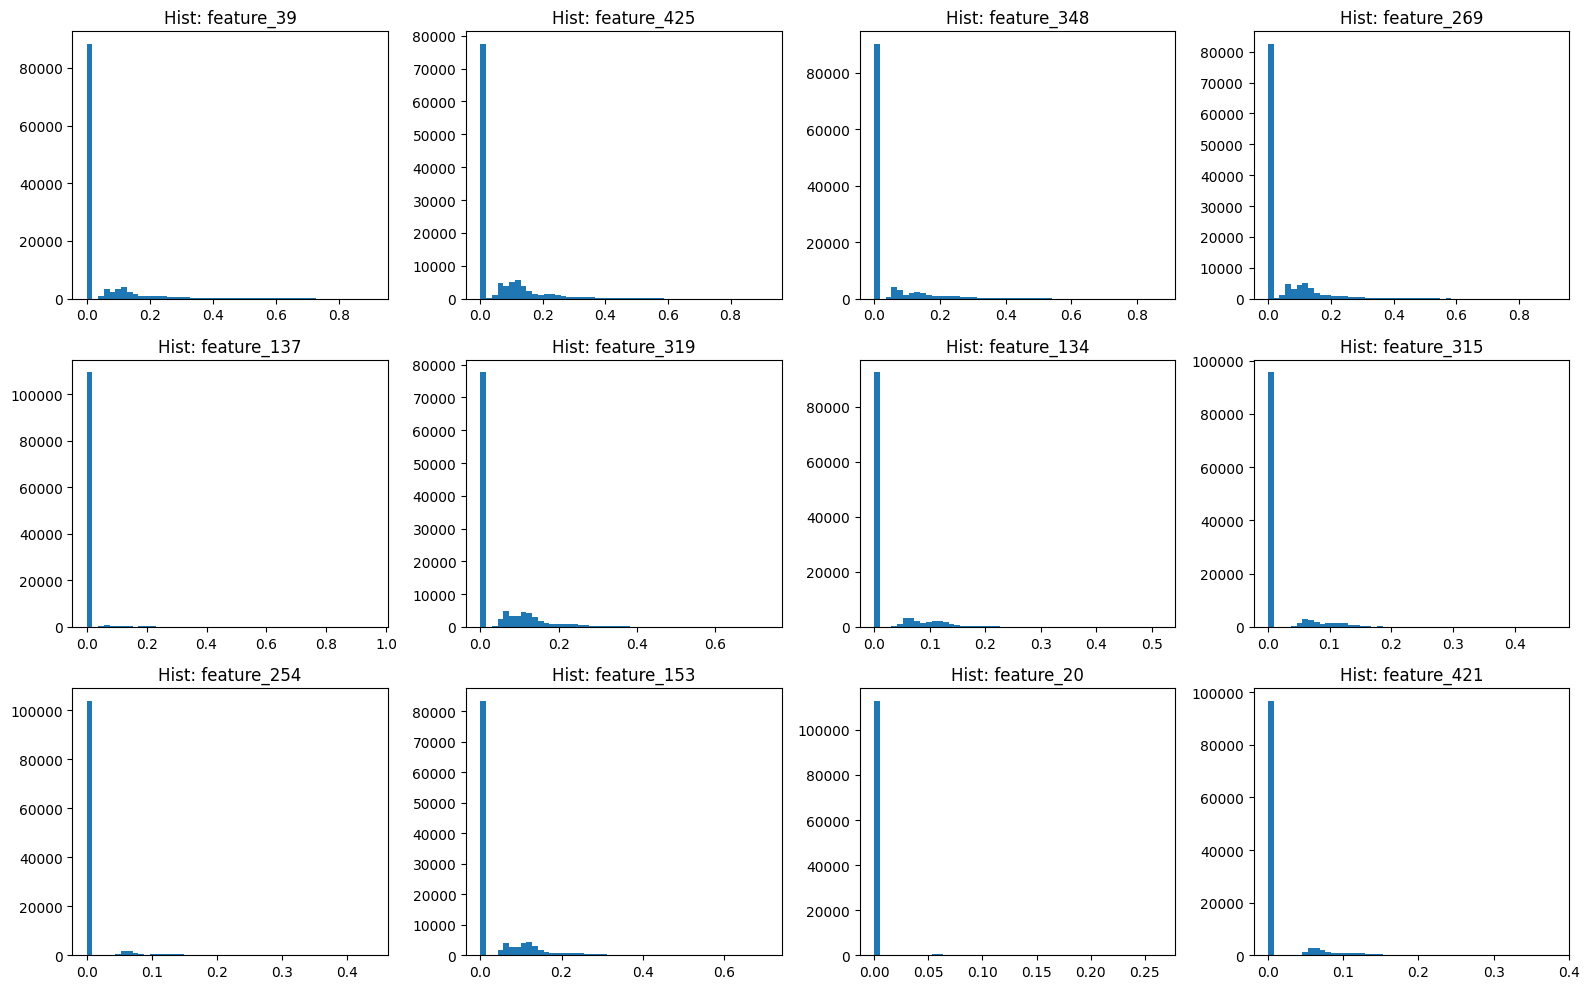

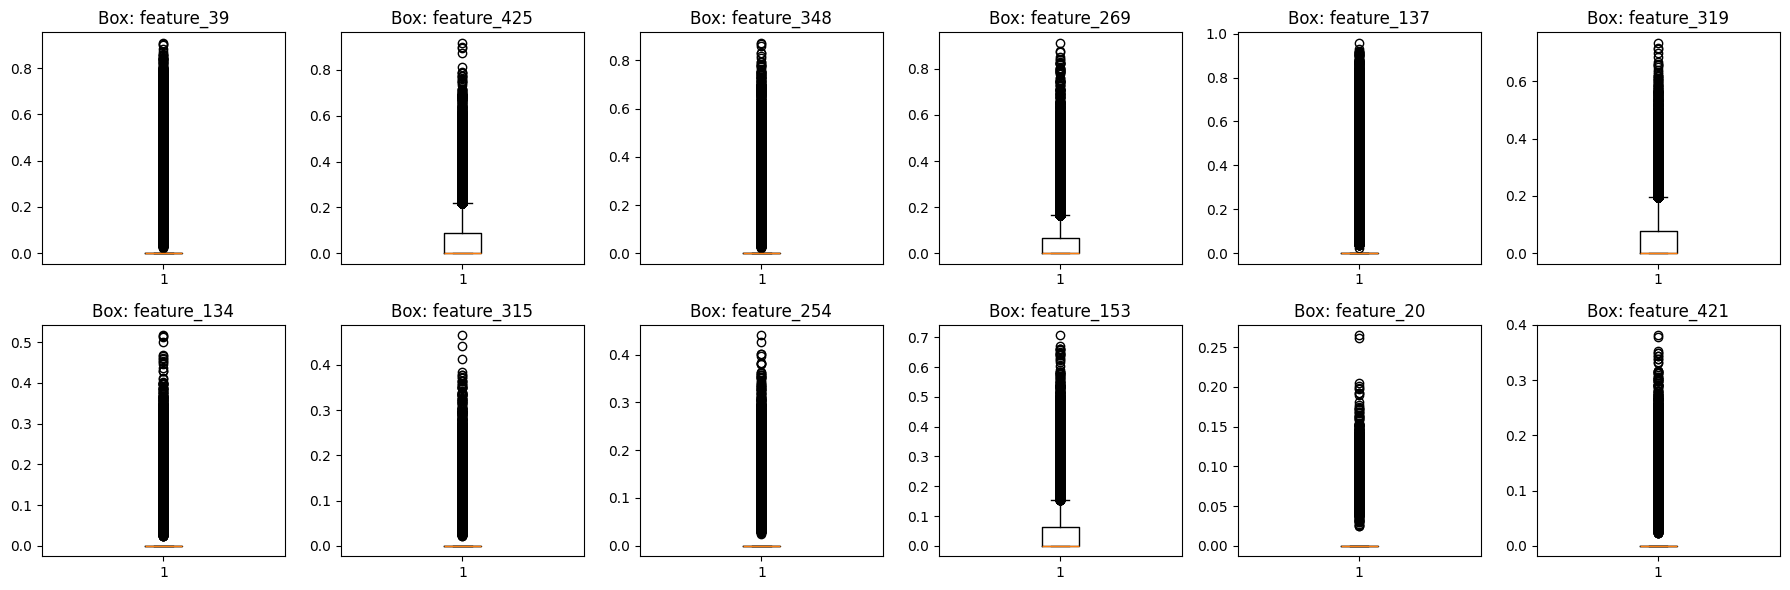

In [107]:
top_k = 6 # predetermine number of top variance features to show
top_var_feats = summary.head(top_k)['feature'].tolist() # list of top var features
rand_feats = list(np.random.default_rng(0).choice(feature_cols, size=6, replace=False)) # randomly select features from the list
inspect_feats = top_var_feats + rand_feats # combine into 12 unique features to test

fig, axes = plt.subplots(3, 4, figsize=(16,10))
axes = axes.ravel()
for i, f in enumerate(inspect_feats[:12]):
    axes[i].hist(train[f].values, bins=50)
    axes[i].set_title(f"Hist: {f}")
plt.tight_layout(); plt.show()

# Boxplots (spot outliers)
fig, axes = plt.subplots(2, 6, figsize=(18,6))
axes = axes.ravel()
for i, f in enumerate(inspect_feats[:12]):
    axes[i].boxplot(train[f].values, vert=True, showfliers=True)
    axes[i].set_title(f"Box: {f}")
plt.tight_layout(); plt.show()

 ***see analysis of data in technical analysis.*

# Logging and tracking of Best Run.

Helpers to keep track of best runs and to analyze the impact of changes.

**Note**: Section creation used LLM to assistance. Reasoning is that it's not a core part of model logic.


## Best run tracking

In [89]:
# ==== Best-run tracking: setup ================================================
# Purpose: keep the best model (by val_acc) in memory *and* on disk, so you can
#          submit from it later and reload it after a fresh session.

import os, json, time, copy
import torch

# Root dirs using the existing DATA_DIR
RUNS_DIR   = os.path.join(DATA_DIR, "runs")
CKPT_DIR   = os.path.join(RUNS_DIR, "checkpoints")
META_DIR   = os.path.join(RUNS_DIR, "meta")
os.makedirs(CKPT_DIR, exist_ok=True)
os.makedirs(META_DIR, exist_ok=True)

# Global pointer to current best current stored in memory
GLOBAL_BEST = None     # will hold {"name": str, "val_acc": float, "model": nn.Module, "ckpt_path": str, "meta_path": str}
BEST_JSON   = os.path.join(META_DIR, "GLOBAL_BEST.json")  # json storage to persist global best across sessions.

Saving helpers.

In [90]:
def _state_dict_cpu(model: torch.nn.Module) -> dict:
    """
    Clone the model's state_dict onto CPU tensors for safety in different devices.
    Might be a good safety net when switching from GPU to CPU on colab.
    """
    return {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}

def _save_checkpoint(name: str, model: torch.nn.Module, extras: dict) -> tuple[str, str]:
    """
    Save a checkpoint (.pt) and a JSON sidecar with metadata.
    Returns: (ckpt_path, meta_path)
    """
    ts = time.strftime("%Y%m%d-%H%M%S")
    base = f"{name}__{ts}"
    ckpt_path = os.path.join(CKPT_DIR, f"{base}.pt")
    meta_path = os.path.join(META_DIR, f"{base}.json")

    payload = {
        "state_dict": _state_dict_cpu(model),
        "extras": extras or {},
    }
    torch.save(payload, ckpt_path)

    with open(meta_path, "w") as f:
        json.dump(payload["extras"], f, indent=2)

    return ckpt_path, meta_path

def _persist_global_best_pointer(best_dict: dict) -> None:
    """
    Write a tiny JSON file that records which run is currently the best.
    """
    safe = {k: v for k, v in best_dict.items() if k != "model"}  # model object not JSON-able
    with open(BEST_JSON, "w") as f:
        json.dump(safe, f, indent=2)

def load_global_best_pointer() -> dict | None:
    """
    Reload the best-run pointer from disk (no model object inside).
    Useful after a fresh Colab session.
    """
    if not os.path.exists(BEST_JSON):
        return None
    with open(BEST_JSON, "r") as f:
        return json.load(f)

In [91]:
def register_run(
    name: str,
    model: torch.nn.Module,
    val_acc: float,
    meta: dict | None = None,
    improve_tol: float = 1e-7,
    also_log_experiment: bool = True,
) -> bool:
    """
    Compare this run against GLOBAL_BEST if its better, it will update memory + disk.
    - Saves a checkpoint (.pt) and a small JSON with your hyperparams/meta.
    - Updates GLOBAL_BEST and writes META_DIR/GLOBAL_BEST.json pointer.

    Returns True if this run became the new best.
    """
    global GLOBAL_BEST

    # 1) Attach essentials to metadata for reconstruction later
    meta = dict(meta or {})
    meta.setdefault("run_name", name)
    meta.setdefault("val_acc", float(val_acc))

    # 2) Save checkpoint + meta to disk
    # weights are already the best epoch through train_model setup
    ckpt_path, meta_path = _save_checkpoint(name, model, meta)

    # 3) Determine if its a new best
    prev_best = GLOBAL_BEST["val_acc"] if (GLOBAL_BEST and "val_acc" in GLOBAL_BEST) else -1.0
    improved  = (val_acc > prev_best + improve_tol)

    # 4) Update in-memory best and persist pointer
    if improved or (GLOBAL_BEST is None):
        GLOBAL_BEST = {
            "name": name,
            "val_acc": float(val_acc),
            "model": copy.deepcopy(model).cpu(),   # keep a CPU copy in memory
            "ckpt_path": ckpt_path,
            "meta_path": meta_path,
        }
        _persist_global_best_pointer(GLOBAL_BEST) # save to json

    # 5) Use logger to right run to file if it has been run
    if also_log_experiment and 'log_experiment' in globals():
        try:
            # pass meta & decision
            log_experiment(
                run_name=name,
                val_acc=float(val_acc),
                meta=meta,
                is_best=bool(improved),
                ckpt_path=ckpt_path
            )
        except Exception as e:
            print(f"[register_run] log_experiment() skipped: {e}")

    print(f"[register_run] saved → {os.path.basename(ckpt_path)} | val_acc={val_acc:.4f} | best? {improved}")
    if GLOBAL_BEST:
        print(f"[register_run] CURRENT BEST → {GLOBAL_BEST['name']} (val_acc={GLOBAL_BEST['val_acc']:.4f})")
    return improved

# Setup Standardization Approaches.

Helper to double check clipping normalization.

In [17]:
def check_scale(name, X_tr, X_te, k=5):
    """Double check transformation is correct. Train should be ~N(0,1) per feature."""
    mu_tr = X_tr.mean(axis=0)
    sd_tr = X_tr.std(axis=0)
    mu_te = X_te.mean(axis=0)
    sd_te = X_te.std(axis=0)
    print(f"[{name}] train mean (first {k}):", np.round(mu_tr[:k], 3))
    print(f"[{name}] train std  (first {k}):", np.round(sd_tr[:k], 3))
    print(f"[{name}] test  mean (first {k}):", np.round(mu_te[:k], 3))
    print(f"[{name}] test  std  (first {k}):", np.round(sd_te[:k], 3))

def clipped_fraction(X_raw, caps):
    """Fraction of train values above cap per feature (to detect over-clipping)."""
    return (X_raw > caps).mean(axis=0)


### Noramlization functions.

In [18]:
def zscore_fit(X_tr):
    "Fit per-feature mean/std on training data for standard z-score scaling"
    mu = X_tr.mean(axis=0)
    sd = X_tr.std(axis=0)
    sd[sd < 1e-8] = 1.0
    return mu, sd

def zscore_transform(X, mu, sd):
    "Apply z-score scaling with precomputed mean/std"
    return (X - mu) / sd

In [19]:
def clipz_fit(X_tr, percentile=99.5):
    "Compute per-feature upper clip values and z-score stats on clipped train data"

    caps = np.percentile(X_tr, percentile, axis=0) # determine cap of upper perctile on train
    Xc = np.minimum(X_tr, caps) # clip on train data only

    # determine mean/std on clipped train to avoid mismatch between two datasets
    mu = Xc.mean(axis=0)
    sd = Xc.std(axis=0)
    sd[sd < 1e-8] = 1.0 # avoid creating massive values when almost constant
    return caps, mu, sd

def clipz_transform(X, caps, mu, sd):
    "Clip features to caps then apply z-score scaling"
    Xc = np.minimum(X, caps)
    return (Xc - mu) / sd

In [20]:
def log1pZ_fit(X_tr):
    "Fit mean/std after log1p transform. Handles zeros and compresses large values)"
    Xtr = np.log1p(X_tr) # safer for zeros and works well in [0,1]
    mu = Xtr.mean(axis=0)
    sd = Xtr.std(axis=0)
    sd[sd < 1e-8] = 1.0  # avoid creating massive values when almost constant
    return mu, sd # on log1p space

def log1pZ_transform(X, mu, sd):
    "Apply log1p then z-score scaling"
    X_ = np.log1p(X)
    return (X_ - mu) / sd

In [21]:
def sqrtZ_fit(X_tr):
    "Fit mean/std after sqrt transform. Try to compress high-magnitude features."
    Xtr = np.sqrt(X_tr) # preserves [0,1] and compresses tail
    mu = Xtr.mean(axis=0);
    sd = Xtr.std(axis=0)

    sd[sd < 1e-8] = 1.0 # avoid creating massive values when almost constant
    return mu, sd

def sqrtZ_transform(X, mu, sd):
    "Apply sqrt then z-score scaling"
    X_ = np.sqrt(X)
    return (X_ - mu) / sd

### Load features, fit, transform and then check mean and STD

In [22]:
# load training feature cols and labels
X_train_raw = train[feature_cols].values.astype(np.float64)
X_test_raw = test[feature_cols].values.astype(np.float64)
y_train = train['label'].values

Z Score

In [23]:
# fit on train data ONLY and then transform both
mu_A, sd_A = zscore_fit(X_train_raw)
Xtr_A = zscore_transform(X_train_raw, mu_A, sd_A)
Xte_A = zscore_transform(X_test_raw,  mu_A, sd_A)

check_scale("Z-score", Xtr_A, Xte_A)

[Z-score] train mean (first 5): [-0. -0. -0. -0. -0.]
[Z-score] train std  (first 5): [1. 1. 1. 1. 1.]
[Z-score] test  mean (first 5): [-0.001  0.003  0.011 -0.004  0.007]
[Z-score] test  std  (first 5): [1.008 1.012 1.012 1.003 1.009]


Clip and transform.

In [24]:
# fit/transform
caps_B, mu_B, sd_B = clipz_fit(X_train_raw, percentile=99.5)
frac_clip = clipped_fraction(X_train_raw, caps_B)

print("Mean fraction clipped across features:", float(frac_clip.mean()))
print("Top-5 features by clipped fraction:", np.round(np.sort(frac_clip)[-5:], 4))

Xtr_B = clipz_transform(X_train_raw, caps_B, mu_B, sd_B)
Xte_B = clipz_transform(X_test_raw,  caps_B, mu_B, sd_B)

check_scale("Clip(p99.5)->Z", Xtr_B, Xte_B)

Mean fraction clipped across features: 0.004966240923348872
Top-5 features by clipped fraction: [0.005 0.005 0.005 0.005 0.005]
[Clip(p99.5)->Z] train mean (first 5): [ 0.  0.  0.  0. -0.]
[Clip(p99.5)->Z] train std  (first 5): [1. 1. 1. 1. 1.]
[Clip(p99.5)->Z] test  mean (first 5): [-0.002  0.003  0.011 -0.005  0.007]
[Clip(p99.5)->Z] test  std  (first 5): [1.001 1.01  1.014 0.996 1.009]


Log1p + Z score

In [25]:
mu_C, sd_C = log1pZ_fit(X_train_raw)
Xtr_C = log1pZ_transform(X_train_raw, mu_C, sd_C)
Xte_C = log1pZ_transform(X_test_raw,  mu_C, sd_C)
check_scale("log1p->Z", Xtr_C, Xte_C)


[log1p->Z] train mean (first 5): [ 0. -0.  0.  0. -0.]
[log1p->Z] train std  (first 5): [1. 1. 1. 1. 1.]
[log1p->Z] test  mean (first 5): [-0.001  0.003  0.011 -0.004  0.007]
[log1p->Z] test  std  (first 5): [1.006 1.01  1.012 1.001 1.008]


Sqrt + Z score

In [26]:
mu_C2, sd_C2 = sqrtZ_fit(X_train_raw)
Xtr_C2 = sqrtZ_transform(X_train_raw, mu_C2, sd_C2)
Xte_C2 = sqrtZ_transform(X_test_raw,  mu_C2, sd_C2)
check_scale("sqrt->Z", Xtr_C2, Xte_C2)

[sqrt->Z] train mean (first 5): [-0. -0. -0.  0. -0.]
[sqrt->Z] train std  (first 5): [1. 1. 1. 1. 1.]
[sqrt->Z] test  mean (first 5): [-0.003  0.002  0.011 -0.005  0.007]
[sqrt->Z] test  std  (first 5): [1.    1.005 1.011 0.996 1.007]


# Mini MLP Classifier

##Setup

***Step 1*** : Create a map of all data sets in order to implement a caparison of each ones accuracy.

In [121]:
import math, time
import torch # core pytorch library for the creation and handling of tensors
import torch.nn as nn # neural network module with pre built layers, loss functions and other components
import torch.nn.functional as F # functional interface for neural network operations that don't have an internal state
from torch.utils.data import TensorDataset, DataLoader # datasets + mini-batching

# Define all preprocessed datasets for comparison
preprocessed_datasets = {
    "Raw": (X_train_raw, X_test_raw),
    "Z-score": (Xtr_A, Xte_A),
    "Clip(p99.5)->Z": (Xtr_B, Xte_B),
    "log1p->Z": (Xtr_C, Xte_C),
    "sqrt->Z": (Xtr_C2, Xte_C2),
}
y = y_train.astype(np.int64)  # ensure labels are integer-encoded for CrossEntropyLoss
N_CLASSES = 50 # number of classes spec

Step 2: Imports, device and seeding intialization to ensure stability and consitency between tests.

In [122]:
import random

# Using a fixed seed ensures reproducibility of random results.
def set_seed(seed=42): # helper to make runs reproducable
    random.seed(seed) # setting pythons random seed
    np.random.seed(seed) # set NumPy's random seed
    torch.manual_seed(seed) # set pytorch CPU RNG seed
    torch.cuda.manual_seed_all(seed) # sett all of CUDA devices seeds

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # use gpu if one exists
set_seed(42) # call helper to initial reproducable random outpus

**Step 4**: Split data into training and validation. Use Stratified split to ensure there is an equal proportion of labels in each subset of data in order to improve consistentcy.

In [123]:
def stratified_split_indices(y: np.ndarray, val_frac: float = 0.20, seed: int = 1337):
    """
    Build train/val index arrays so each split keeps similar class proportions.
    y: 1D array of class labels (ints 0..49)
    val_frac: fraction that should go into validation (80/20)
    seed: makes the split reproducible
    """
    rng = np.random.default_rng(seed)          # deterministic random generator
    y = np.asarray(y)                          # ensure y is a NumPy array
    train_idx, val_idx = [], []                # will collect row indices here

    # loop over every class and equally distribute between data sets
    for c in np.unique(y):                     # loop over each class label c
        idx = np.where(y == c)[0]              # indices of rows whose label is c
        rng.shuffle(idx)                       # shuffle those indices (random order)
        n_val = max(1, int(round(val_frac * len(idx))))  # size of the val slice for this class
        val_idx.extend(idx[:n_val].tolist())   # first n_val go to validation for class c
        train_idx.extend(idx[n_val:].tolist()) # the rest go to training for class c

    rng.shuffle(train_idx)                     # final shuffle so classes are mixed
    rng.shuffle(val_idx)                       # same for val indices
    return np.array(train_idx), np.array(val_idx)  # return as arrays for indexing

train_idx, val_idx = stratified_split_indices(y, val_frac=0.20, seed=1337)  # make a 80/20 stratified split
print(len(train_idx), len(val_idx))  # Make sure sizes add up to total samples

92323 23083


**Step 5** Build data loaders anmd mini batches using py torch tensors for training and validation data sets.

In [127]:
from torch.utils.data import TensorDataset, DataLoader

def initialize_loaders(dataset_key: str = "Raw", batch_size: int = 1024):
    """Create train/validation DataLoaders from preprocessed_datasets
    using the provided batch_size and the train_idx / val_idx splits.
    Returns (train_loader, val_loader, in_dim) where in_dim is n_features.
    """
    BATCH_SIZE = batch_size  # test best batch size for data

    # Select a preprocessed dataset to use for these DataLoaders
    X_train_proc, X_test_proc = preprocessed_datasets[dataset_key]

    # Convert the selected preprocessed arrays into PyTorch tensors for the training split
    X_tr = torch.tensor(X_train_proc[train_idx], dtype=torch.float32)
    y_tr = torch.tensor(y[train_idx],           dtype=torch.long)

    # Convert the selected preprocessed arrays into PyTorch tensors for the validation split
    X_val = torch.tensor(X_train_proc[val_idx], dtype=torch.float32)
    y_val = torch.tensor(y[val_idx],            dtype=torch.long)

    # Wrap tensors in TensorDataset so DataLoader can iterate in mini-batches
    train_ds = TensorDataset(X_tr, y_tr)
    val_ds   = TensorDataset(X_val, y_val)

    # DataLoaders provide batching and shuffling for train
    train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True,  drop_last=False)
    val_loader   = DataLoader(val_ds,   batch_size=BATCH_SIZE, shuffle=False, drop_last=False)

    in_dim = X_train_proc.shape[1]  # number of features

    return train_loader, val_loader, in_dim

## Mini MLP Model

In [112]:

class MiniMLP(nn.Module): # declaration of an nn.module subclass to track parameters

  # input_dim: is the input feature count.
  # n_classes: are the numberof output logits/classes. Should be 50 for this.
  # hidden: tupple of the widths of the hiden layers
  # dropout: probility to drop units during training in order to regularize
  def __init__(self, in_dim: int, n_classes: int, hidden=(512, 256), dropout: float = 0.10):
    super().__init__() # intialize module base of nn.Module
    layers = []  # collect layers then wrap them in nn.Sequential to stack them in order
    prev = in_dim  # track input size to the next Linear layer

    # Stack the hidden part of the MLP --> each iteration:
    # 1. create a fully connected layer with h neurons
    # 2. Applies element-wise ReLu nonlinearity
    # 3. Applies dropout for regularization on training
    # 4. Update prev so that the next layer connect to h neurons
    for h in hidden: # iterate over hideen layer sizes applying linear
      layers.append(nn.Linear(prev, h)), # compute hidden layer using linear transformation on h sized vector
      layers.append(nn.ReLU()) # element-wise non-linearity to be able to learn curves datasets
      layers.append(nn.Dropout(dropout)), # randomly zero out activation with a probability of 10% to discourage reliance on a single path and overfitting
      prev = h # update the previous size for the next layer

    layers.append(nn.Linear(prev, n_classes))  # final classifier layer gets mapped to logits for each class
    self.net = nn.Sequential(*layers)  # pipeline container automatically wires the output of the last layer to the input of the next

    # He (Kaiming) initialization improves signal flow with ReLU activations
    # Based on random weight intialization in lab 8
    for m in self.net:
        if isinstance(m, nn.Linear):  # only initialize Linear layers
            nn.init.kaiming_normal_(m.weight, nonlinearity='relu')  # weight init tuned for ReLU
            nn.init.zeros_(m.bias)  # initialize biases to zero

  def forward(self, x: torch.Tensor) -> torch.Tensor:
        # Seqential being forward able enables you to simply call it
        return self.net(x)  # forward pass returns logits (no softmax, CE loss expects logits and implements softmax itself)




## Evaluation, accuracy and optimizer



In [113]:
def evaluate_accuracy(model: nn.Module, loader: DataLoader, device: torch.device) -> float:
    """
    Compute classification accuracy from raw logits.

    What it does:
    - Converts model outputs (logits) into predicted class IDs with argmax.
    - Compares predictions to ground-truth labels.
    - Returns the mean accuracy as a Python float.

    Expected inputs:
    - logits: Float tensor of shape [B, K], raw (unnormalized) class scores.
    - y_true: Long (int64) tensor of shape [B], class labels in [0,49].

    Steps:
    1) Ensure targets are int64 (safety).
    2) Take argmax over dim=1 to get predicted class per example.
    3) Compare predictions to targets.
    4) Cast to float and average to obtain accuracy in [0, 1].
    5) Convert to Python float easy logging/printing.
    """
    model.eval()                                    # Switch to inference mode (Dropout off, stable behavior)
    total_correct, total_examples = 0, 0            # Initialize counters for accuracy calculation
    for xb, yb in loader:
        xb, yb = xb.to(device), yb.to(device)       # Move inputs and labels to the same device as the model
        logits = model(xb)                          # Forward pass to obtain logits [B, K]
        preds = logits.argmax(dim=1)                # Convert logits to predicted class IDs
        total_correct += (preds == yb).sum().item() # Add number of correct predictions in this batch
        total_examples += yb.size(0)                # Add batch size to total examples
    return total_correct / max(1, total_examples)   # Compute overall accuracy (guard against empty loader)



**Step 9**: Set optimizer to be used

In [114]:
def build_optimizer(
    model: nn.Module,
    lr: float,
    weight_decay: float,
    opt_name: str = "adamw",
) -> torch.optim.Optimizer:
    """
    Build an optimizer for the given model.

    opt_name:
      - "adamw": AdamW (Stronger regularization)
      - "adam":  Adam (no decoupled weight decay)
      - "sgd":   SGD with momentum
    """
    opt_name = opt_name.lower()

    if opt_name == "adamw":
        return torch.optim.AdamW(
            model.parameters(),
            lr=lr,
            weight_decay=weight_decay,
        )
    elif opt_name == "adam":
        return torch.optim.Adam(
            model.parameters(),
            lr=lr,
            weight_decay=weight_decay,
        )
    elif opt_name == "sgd":
        return torch.optim.SGD(
            model.parameters(),
            lr=lr,
            momentum=0.9,
            weight_decay=weight_decay,
            nesterov=True,
        )
    else:
        raise ValueError(f"Unknown optimizer: {opt_name}")

In [115]:
def build_criterion(label_smoothing: float = 0.0) -> nn.Module:
    "Standard multiclass loss with optional label smoothing for regularization"
    return nn.CrossEntropyLoss(label_smoothing=label_smoothing)

## Training

**Step 11**: Define training steps and save the loss on the current epoch

In [116]:
def train_one_epoch(model: nn.Module,
                    loader: DataLoader,
                    optimizer: torch.optim.Optimizer,
                    criterion: nn.Module,
                    device: torch.device,
                    grad_clip: float | None = None) -> tuple[float, float]:
    """
    Run one full training epoch over a DataLoader and return the mean loss
    and training accuracy.
    """

    model.train()  # Enable training mode (Dropout/BatchNorm).

    # Initialize loss accumulator, correct-prediction counter, and sample counter.
    running_loss, running_correct, seen = 0.0, 0, 0

    for xb, yb in loader:
        xb, yb = xb.to(device), yb.to(device)  # Move batch to the device.

        logits = model(xb)                     # Forward pass to obtain logits.
        loss = criterion(logits, yb)           # Compute cross-entropy loss.

        optimizer.zero_grad(set_to_none=True)  # Clear previous gradients.
        loss.backward()                        # Backpropagate to compute gradients.

        if grad_clip is not None:
            # Possibly try using gradient clip normalizae to stabilize on sharp updates
            nn.utils.clip_grad_norm_(model.parameters(), grad_clip)

        optimizer.step()                       # Update parameters with the optimizer.

        batch_size = yb.size(0)
        running_loss    += loss.item() * batch_size   # Accumulate summed loss scaled by batch size.
        running_correct += (logits.argmax(dim=1) == yb).sum().item()  # Count correct predictions.
        seen            += batch_size                  # Track total number of examples seen.

    mean_loss = running_loss / max(1, seen)           # Return mean loss over all seen samples.
    train_acc = running_correct / max(1, seen)        # Fraction of correctly classified examples.
    return mean_loss, train_acc

In [117]:
import copy

def update_checkpoint_if_improved(model: nn.Module,
                                  val_acc: float,
                                  best_val_acc: float,
                                  best_state: dict | None,
                                  eps: float = 1e-5) -> tuple[float, dict | None, bool]:
    """
    Compare current validation accuracy with the best so far and checkpoint if improved.
    """
    # No significant improvement then keep previous best.
    if val_acc <= best_val_acc + eps:
        return best_val_acc, best_state, False

    # Deep-copy current state_dict as the new best checkpoint.
    new_state = copy.deepcopy(model.state_dict())

    # Return updated best accuracy, state, and improvement flag.
    return val_acc, new_state, True

In [118]:
def train_model(model: nn.Module,
                train_loader: DataLoader,
                val_loader: DataLoader,
                device: torch.device,
                epochs: int = 30,
                lr: float = 3e-3,
                weight_decay: float = 1e-4,
                patience: int = 5,
                opt_name: str = "adamw",
                grad_clip: float | None = None,
                label_smoothing: float = 0.05):
    """
    Train a model with early stopping and restore the best checkpoint.

    Tracks both loss and accuracy for train/validation, and supports
    optional gradient clipping and label smoothing.
    """
    model = model.to(device)  # move model to device

    optimizer = build_optimizer(model, lr, weight_decay, opt_name)  # build optimizer (Adam/AdamW/SGD)
    # Use CrossEntropyLoss with optional label smoothing to regularize predictions.
    criterion = nn.CrossEntropyLoss(label_smoothing=label_smoothing)

    best_val_acc: float = -1.0                         # best validation accuracy so far
    best_state: dict | None = None                     # best model weights
    best_epoch: int = 0                                # epoch index where best_val_acc was seen
    no_improve: int = 0                                # epochs since last improvement

    # Keep full metric history for later plotting/inspection.
    history: dict[str, list[float] | int | float] = {
        "train_loss": [],
        "val_loss":   [],
        "train_acc":  [],
        "val_acc":    [],
    }

    for epoch in range(1, epochs + 1):
        # one full training pass over train_loader
        mean_train_loss, train_acc = train_one_epoch(          # returns accuracies and loss
            model,
            train_loader,
            optimizer,
            criterion,
            device,
            grad_clip=grad_clip,
        )

        # evaluate current model on validation set
        model.eval()
        val_loss_sum, val_correct, val_seen = 0.0, 0, 0

        with torch.no_grad():
            for xb, yb in val_loader:
                xb, yb = xb.to(device), yb.to(device)          # Move batch to the device.
                logits = model(xb)                             # Forward pass on validation batch.
                loss = criterion(logits, yb)                   # Compute validation loss.

                batch_size = yb.size(0)
                val_loss_sum += loss.item() * batch_size       # Accumulate validation loss.
                val_correct  += (logits.argmax(dim=1) == yb).sum().item()  # Count correct preds.
                val_seen     += batch_size                     # Track number of validation samples.

        val_loss = val_loss_sum / max(1, val_seen)             # Mean validation loss.
        val_acc  = val_correct  / max(1, val_seen)             # Validation accuracy.

        # log metrics for later inspection
        history["train_loss"].append(mean_train_loss)
        history["val_loss"].append(val_loss)
        history["train_acc"].append(train_acc)
        history["val_acc"].append(val_acc)

        print(
            f"epoch {epoch:02d} | "
            f"train_loss {mean_train_loss:.4f} | val_loss {val_loss:.4f} | "
            f"train_acc {train_acc:.4f} | val_acc {val_acc:.4f}"
        )

        # update best checkpoint if validation accuracy improved
        best_val_acc, best_state, improved = update_checkpoint_if_improved(
            model,
            val_acc,
            best_val_acc,
            best_state,
            eps=1e-5,
        )

        # track early-stopping patience
        if improved:
            best_epoch = epoch                   # remember which epoch produced the best model
            no_improve = 0
        else:
            no_improve += 1
            if no_improve >= patience:
                print(f"Early stopping at epoch {epoch} (best val_acc={best_val_acc:.4f})")
                break

    # restore best weights before returning
    if best_state is not None:
        model.load_state_dict(best_state)

    # record summary stats about the best checkpoint
    history["best_epoch"]   = best_epoch
    history["best_val_acc"] = best_val_acc

    # return trained model, training history, and best validation accuracy
    return model, history, best_val_acc

# Baseline Testing

## Compare Performance of Preprocessed sets

In [85]:
all_results = []
BATCH_SIZE = 1024

for name in preprocessed_datasets.keys():
    print(f"\n{'='*10} Training with {name} {'='*10}")

    # Create train/validation DataLoaders for this preprocessed dataset
    train_loader, val_loader, X_train_proc, X_test_proc = initialize_loaders(
        dataset_key=name,
        batch_size=BATCH_SIZE,
    )

    in_dim = X_train_proc.shape[1]  # number of input features
    model = MiniMLP(
        in_dim,
        N_CLASSES,
        hidden=(512, 256), # small two layer model
        dropout=0.10,
    )

    trained_model, history, best_val_acc = train_model(  # train with early stopping
        model,
        train_loader,
        val_loader,
        device=device,
        epochs=30, # cap epochs
        lr=3e-3, # learning rate for Adamw
        weight_decay=1e-4, # L2 regularization for AdamW
        patience=15,# stop if val accuracy doesn’t improve for 15 epochs
        opt_name="adamw",
    )

    print(f"Best validation accuracy for {name}: {best_val_acc:.4f}")
    all_results.append(
        {"name": name, "best_val_acc": best_val_acc, "history": history}
    )


========== Training with Raw ==========


KeyboardInterrupt: 

## Result Visualization

In [ ]:
# Summarize results
results_df = pd.DataFrame(all_results)
print("\n--- Comparison of Preprocessing Methods ---")
print(results_df[['name', 'best_val_acc']].sort_values(by='best_val_acc', ascending=False))

# Visualize results
plt.figure(figsize=(10, 6))
plt.bar(results_df['name'], results_df['best_val_acc'], color='skyblue')
plt.xlabel("Preprocessing Method")
plt.ylabel("Best Validation Accuracy")
plt.title("Comparison of Model Performance with Different Preprocessing Methods")
plt.ylim(0.4, results_df['best_val_acc'].max() * 1.1) # Adjust y-axis for better visibility
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Experiment and Optimize

Will reuse many of the functions define in the MiniMLP Section.

## Models

In [86]:
class ExperiementMLP(nn.Module):
    def __init__(
        self,
        in_dim: int,
        n_classes: int,
        hidden=(512, 256),
        dropout: float = 0.10,
        activation: str = "relu",   # Options: relu, gelu, tanh
    ):
        super().__init__()
        layers = []
        prev = in_dim

        act_name = activation.lower()

        # choose activation module once
        if act_name == "relu":
            act_layer = nn.ReLU
        elif act_name == "gelu":
            act_layer = nn.GELU
        elif act_name == "tanh":
            act_layer = nn.Tanh
        else:
            raise ValueError(f"Unsupported activation: {activation}")

        # Append Layers
        for h in hidden:
            layers.append(nn.Linear(prev, h))
            layers.append(act_layer())
            layers.append(nn.Dropout(dropout))
            prev = h

        layers.append(nn.Linear(prev, n_classes))
        self.net = nn.Sequential(*layers)

        # Weight iniatlization --> Kaiming for ReLU/GELU and Xavier for tanh
        for m in self.net:
            if isinstance(m, nn.Linear):
                if act_name in ("relu", "gelu"):
                    nn.init.kaiming_normal_(m.weight, nonlinearity="relu")
                elif act_name == "tanh":
                    nn.init.xavier_normal_(m.weight)
                nn.init.zeros_(m.bias)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.net(x)

## Configuration Intialization for Sweep.

Best Parameters

**Optimizer Hyperparater Configuration.**: step size + weight decay

In [130]:
# ------ Optimizer Hyperparater Configuration.: step size + weight decay -----

OPT_CONFIGS = {
    "adam_strong_wd": dict(
        opt_name="adam",
        lr=3e-3,
        weight_decay=3e-5,
    ),
}

# ------ Architecture Configuaration:  Depth + width + activation + dropout ----

ARCH_CONFIGS = {
    "mlp_shallow_wide": dict(
        hidden=(4096, 2048),
        activation="gelu",
        dropout=0.10,
    ),
}

# ----- Current best config ------

BEST_MLP_SHALLOW_WIDE = dict(
    arch_tag="mlp_shallow_wide",   # ARCH_CONFIGS key
    opt_tag="adam_strong_wd",      # OPT_CONFIGS key
    batch_size=526,
    epochs=400,
)


## Run Sweep

In [132]:
cfg = BEST_MLP_SHALLOW_WIDE

arch = ARCH_CONFIGS[cfg["arch_tag"]]
opt  = OPT_CONFIGS[cfg["opt_tag"]]

# 1) Get loaders AND in_dim from the reusable helper
train_loader, val_loader, in_dim = initialize_loaders(
    dataset_key="Raw",
    batch_size=cfg["batch_size"],
)

# 2) Now build the model using the returned in_dim
model = ExperiementMLP(
    in_dim=in_dim,
    n_classes=N_CLASSES,
    hidden=arch["hidden"],
    activation=arch["activation"],
    dropout=arch["dropout"],
)

# 3) Train
model, history, best_val_acc = train_model(
    model,
    train_loader,
    val_loader,
    device=device,
    epochs=cfg["epochs"],
    lr=opt["lr"],
    weight_decay=opt["weight_decay"],
    opt_name=opt["opt_name"],
    patience=20,
    label_smoothing = 0.05,
    grad_clip= None,
)

epoch 01 | train_loss 2.8970 | val_loss 2.6053 | train_acc 0.2917 | val_acc 0.3656
epoch 02 | train_loss 2.4716 | val_loss 2.3917 | train_acc 0.3997 | val_acc 0.4162
epoch 03 | train_loss 2.2583 | val_loss 2.2807 | train_acc 0.4545 | val_acc 0.4502
epoch 04 | train_loss 2.1014 | val_loss 2.1677 | train_acc 0.4963 | val_acc 0.4767
epoch 05 | train_loss 1.9823 | val_loss 2.0949 | train_acc 0.5287 | val_acc 0.4979
epoch 06 | train_loss 1.8802 | val_loss 2.0412 | train_acc 0.5590 | val_acc 0.5148
epoch 07 | train_loss 1.7965 | val_loss 2.0044 | train_acc 0.5835 | val_acc 0.5249
epoch 08 | train_loss 1.7209 | val_loss 1.9123 | train_acc 0.6031 | val_acc 0.5526
epoch 09 | train_loss 1.6563 | val_loss 1.9115 | train_acc 0.6230 | val_acc 0.5551
epoch 10 | train_loss 1.5917 | val_loss 1.8577 | train_acc 0.6418 | val_acc 0.5696
epoch 11 | train_loss 1.5413 | val_loss 1.8458 | train_acc 0.6569 | val_acc 0.5741
epoch 12 | train_loss 1.4923 | val_loss 1.8077 | train_acc 0.6721 | val_acc 0.5875
epoc

KeyboardInterrupt: 